In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Multiple Linear Regression.csv')

In [3]:
data.head()

,year,staff_wage_mean,shanghai_GDP,fixed_asset_investment,cpi,house_area,house_ popula_mean
0,1978,672,272.81,27.91,100.0,234.03,3.77
1,1979,784,286.43,35.58,100.9,564.62,3.82
2,1980,873,311.89,45.43,106.9,607.91,3.77
3,1981,870,324.76,54.60,108.3,649.93,3.70
4,1982,883,337.07,71.34,108.7,684.61,3.67


In [4]:
data.drop(['year'], axis = 1).describe()

,staff_wage_mean,shanghai_GDP,fixed_asset_investment,cpi,house_area,house_ popula_mean
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,18997.657895,6507.400789,2120.031053,407.578947,2812.162632,3.034737
std,21045.624730,7648.870836,2116.264094,227.130758,2440.915147,0.373904
min,672.000000,272.810000,27.910000,100.000000,234.030000,2.690000
25%,1989.000000,571.170000,193.415000,154.700000,804.360000,2.750000
50%,11044.000000,3198.170000,1863.195000,518.650000,1667.640000,2.840000
75%,28882.500000,10241.095000,3829.455000,572.475000,5702.160000,3.267500
max,71268.000000,25123.450000,6352.700000,748.400000,7580.770000,3.820000


In [5]:
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP']]
target = ['shanghai_GDP']

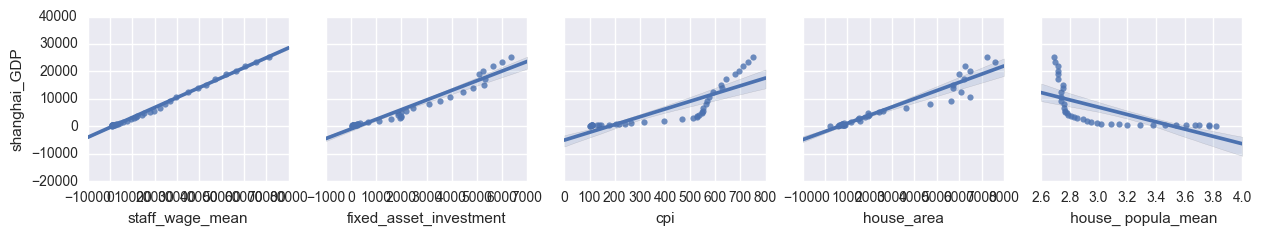

In [6]:
g = sns.pairplot(data.drop(['year'], axis = 1), kind="reg",  x_vars= feature, y_vars=target)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)

In [8]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
RSS = np.mean((pred - y_test) ** 2)
R_squares = lr.score(X_test, y_test)

In [9]:
print('Coefficients:\n', lr.coef_)
print('intercept:', lr.intercept_)
print("Residual sum of squares: %.2f" % RSS)
print('Variance score: %.2f' % R_squares)

Coefficients:
 [[  3.56891902e-01   6.14236796e-01  -4.96668092e+00  -1.11850146e-01
   -2.46190630e+02]]
intercept: [ 1481.06549865]
Residual sum of squares: 38328.17
Variance score: 1.00


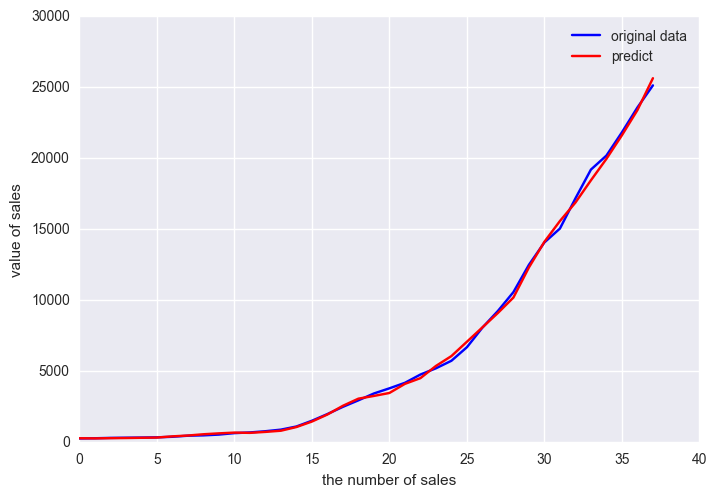

In [10]:
plt.plot(range(len(data)),data.shanghai_GDP,'b', label="original data")  
plt.plot(range(len(data)),lr.predict(data[feature]),'r',label="predict")  
plt.legend(loc="upper right")
plt.xlabel("the number of sales")  
plt.ylabel('value of sales')